## Project 1: Explore Weather Trends ##

**Extract data from SQL database**

After making a few test queries I decided to extract the weather data into a single CSV using a union of two queries, one from `global_data` and the other from `city_data`:

`
select city as location, year, avg_temp
from city_data
where city in ('San Francisco', 'Manila', 'Columbus')
union
select 'global' as location, year, avg_temp
from global_data
order by year
`

I also decided to look at data from 3 cities with what I assumed to be distinct climates - San Francisco, Manila, and Columbus, so I could compare global temperature trends to local temperature trends from multiple locations.

**Load data into pandas**

I decided to use pandas to work with the data.

In [2]:
%matplotlib inline

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("results.csv")

In [5]:
df.head()

,location,year,avg_temp
0,Columbus,1743,7.46
1,Columbus,1744,15.73
2,Columbus,1745,6.91
3,Columbus,1746,NaN
4,Columbus,1747,NaN


**Compute the moving average temperature**

Since all of the data is in this dataframe, I sorted the rows by location and year.

In [6]:
df = df.sort_values(by = ["location", "year"])

Then I created a pivot table from the dataframe so that the years are the index, the locations are the columns, and the row values are the average temperatures.

In [7]:
pivot = df.pivot(index = "year", columns = "location", values = "avg_temp")

In [8]:
pivot.tail(10)

location,Columbus,Manila,San Francisco,global
year,,,,
2006,15.31,27.23,15.02,9.53
2007,15.35,27.21,14.94,9.73
2008,14.46,26.94,15.05,9.43
2009,14.46,26.92,15.02,9.51
2010,14.64,27.49,14.67,9.70
2011,15.24,26.82,14.50,9.52
2012,15.91,27.34,15.05,9.51
2013,16.05,27.87,16.23,9.61
2014,NaN,NaN,NaN,9.57


Since the years are the index and each location's temperatures are in a separate column, the `rolling.mean` function can compute the moving average for each location. I decided to use a 5-year moving average.

In [9]:
moving_averages = pivot.rolling(5).mean()

In [10]:
moving_averages.tail(10)

location,Columbus,Manila,San Francisco,global
year,,,,
2006,14.932,27.122,15.198,9.530
2007,14.962,27.144,15.186,9.562
2008,14.974,27.118,15.110,9.542
2009,14.890,27.084,15.040,9.580
2010,14.844,27.158,14.940,9.580
2011,14.830,27.076,14.836,9.578
2012,14.942,27.102,14.858,9.534
2013,15.260,27.288,15.094,9.570
2014,NaN,NaN,NaN,9.582


This step was more difficult when I was attempting to compute the moving average temperature for each location from the original, unpivoted dataframe. That involved filtering the dataframe for each location, computing the moving average of temperatures in the filtered rows, storing the results in a separate dataframe and merging that with the original.

**Plotting the data**

[Text(0, 0.5, 'temperature (celsius)')]

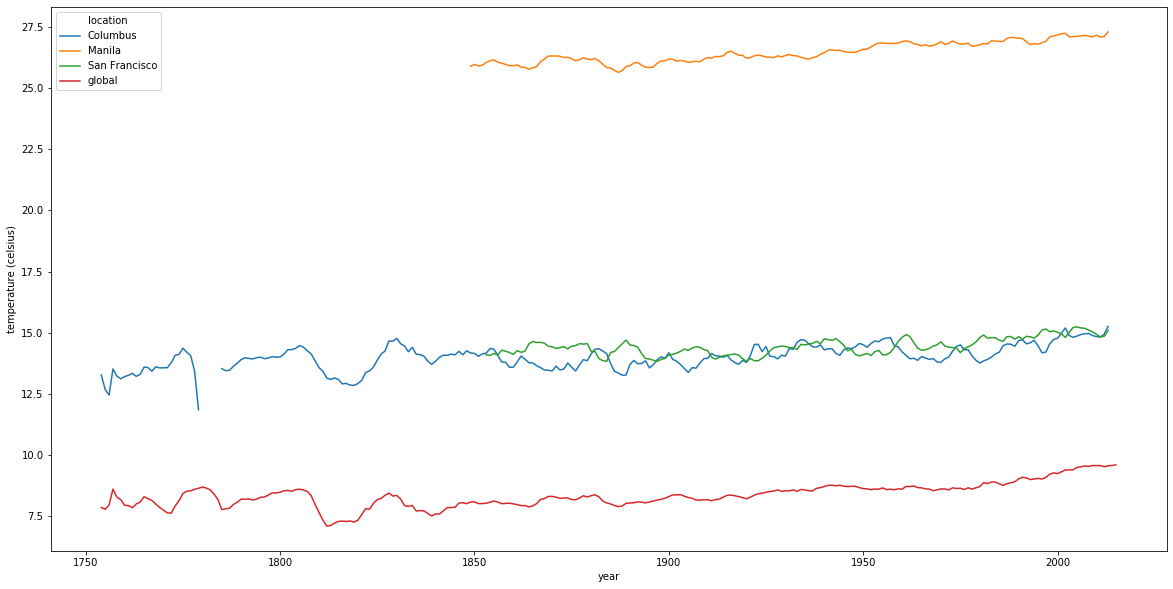

In [11]:
plt = moving_averages.plot(figsize = (25, 10))
plt.set(ylabel = "temperature (celsius)")

This view is useful for comparing the average temperatures of each location but the scale of the vertical axis makes it difficult to see temperature trends in individual locations. It appears that there is a slight upward trend in global temperatures, but it's less clear for others.

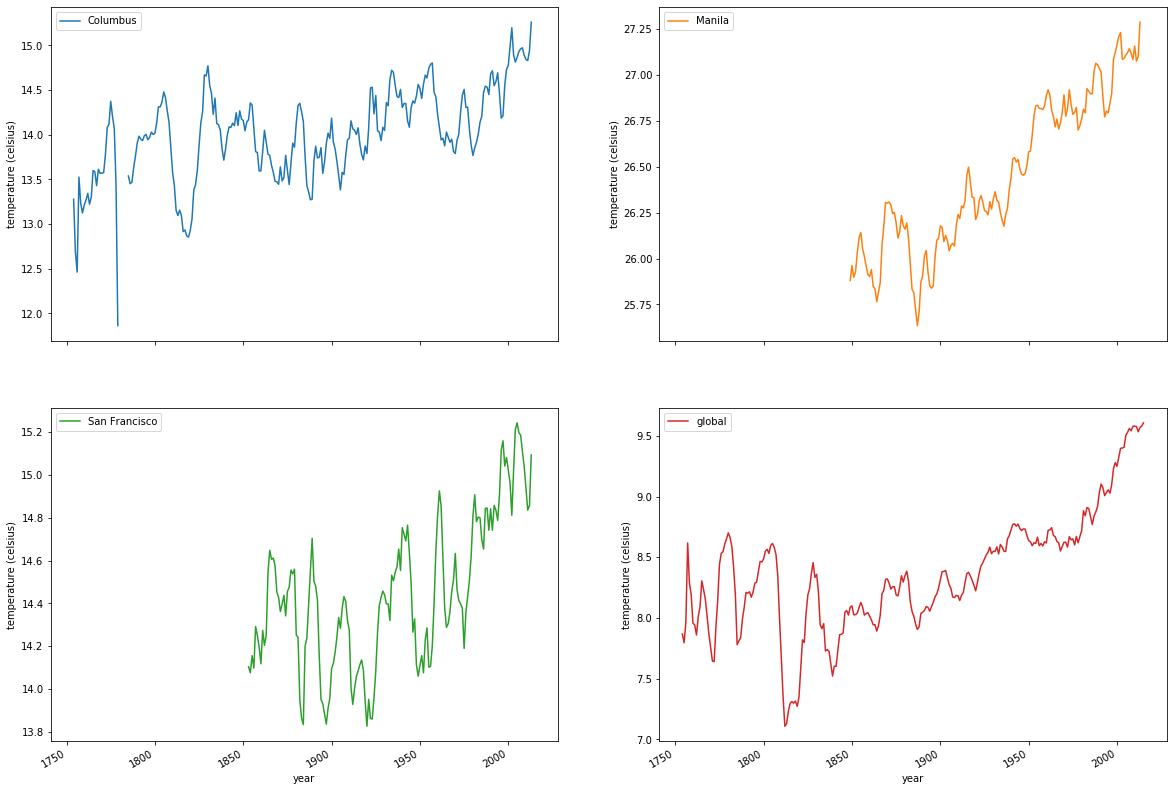

In [12]:
plt2 = moving_averages.plot(subplots = True, layout = (2, 2), figsize = (20, 15))
for row in plt2:
    for subplot in row:
        subplot.set(ylabel = "temperature (celsius)")

**Observations**

- there appears to be a general upward trend in average temperatures, both globally and in each of the given locations, over time. My choice of a 5 year moving average still allows for some year-to-year variance in measurements to be expressed through the spikiness of the graphs but in general there appears to be an upward trend.

- the upward trend in global average temperature seems to have accelerated in the past 50 years of observations.

- based on the first plot, the temperature trends seem to reflect the climate of each location. It makes sense for the global average temperature to be the lowest since 70% of Earth's surface is water, which will have a lower surface temperature than most land. It also makes sense for Manila to have a much higher average temperature than every other location since it's located in a tropical climate. I chose San Francisco and Columbus to see if there would be a noticeable difference in temperatures between a coastal city and landlocked city, but the difference was much less than I expected. One possible explanation is that the two cities have similar latitudes.

- there is a noticeable dip in the average global temperature, as well as the temperature in Columbus, in the early 1800s. The dips occur at the same time and are roughly the same shape, so it's possible that if we had data on temperatures in San Francisco or Manila during that time, we would see similar results. One possible explanation could be dust from a volcanic eruption blocking sunlight for a period of time.